<a href="https://colab.research.google.com/github/chetan015/deep-learning/blob/master/Assignment-02/Assignment-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# Import all required modules
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# Download the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


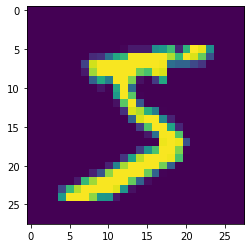

In [0]:
# Plot a training image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Reshape the training data as 60000 images of size 28x28 with one channel each
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

(60000, 28, 28, 1)


In [0]:
# Convert the grayscale intensity values (0-255) to lie between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# View the training class labels for first ten samples
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Build the model
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 256)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

60000/60000 [==============================] - 31s 511us/step - loss: 0.1259 - acc: 0.9602
Epoch 2/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0478 - acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0360 - acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0282 - acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0251 - acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0212 - acc: 0.9937
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0189 - acc: 0.9943
Epoch 8/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0170 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0146 - acc: 0.9959
Epoch 10/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0147 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[1.3560505403518677, 0.5129]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.9078564e-11 8.9078564e-11 8.9078564e-11 8.9078564e-11 8.9078564e-11
  8.9078564e-11 8.9078564e-11 1.0000000e+00 8.9078564e-11 8.9078564e-11]
 [3.6457289e-11 3.6457289e-11 1.0000000e+00 3.6457289e-11 3.6457289e-11
  3.6457289e-11 3.6457289e-11 3.6457289e-11 3.6457289e-11 3.6457289e-11]
 [4.6804699e-10 1.0000000e+00 4.6804699e-10 4.6804699e-10 4.6804699e-10
  4.6804699e-10 4.6804699e-10 4.6804699e-10 4.6804699e-10 4.6804699e-10]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.7549995e-13 1.7549995e-13 1.7549995e-13 1.7549995e-13 1.0000000e+00
  1.7549995e-13 1.7549995e-13 1.7549995e-13 1.7549995e-13 1.7549995e-13]
 [7.2593468e-12 1.0000000e+00 7.2593468e-12 7.2593468e-12 7.2593468e-12
  7.2593468e-12 7.2593468e-12 7.2593468e-12 7.2593468e-12 7.2593468e-12]
 [6.3186230e-09 6.3186230e-09 6.3186230e-09 6.3186230e-09 1.0000000e+00
  6.3186230e-09 6.3186230e-09 6.3186230e-09 6.3186230e-09 